In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import tensorboard as tb
import tensorflow as tf 

from tensorflow.python.summary.summary_iterator import summary_iterator
from matplotlib import pyplot as plt
from scipy import stats

In [7]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/baseline-ce-0/events.out.tfevents.1605392097.34dafb52bef4.8822.0"
counter = 0 
for e in tf.compat.v1.train.summary_iterator(path):
    if counter > 5: 
        break
    print(e)
    counter += 1 

wall_time: 1605392097.8795836
file_version: "brain.Event:2"

wall_time: 1605392097.8858826
summary {
  value {
    tag: "loss"
    simple_value: 0.0
  }
}

wall_time: 1605392097.8859286
summary {
  value {
    tag: "train/accuracy"
    simple_value: 0.0
  }
}

wall_time: 1605392097.8859515
summary {
  value {
    tag: "train/w-f1"
    simple_value: 0.0
  }
}

wall_time: 1605392097.8859723
summary {
  value {
    tag: "train/micro-f1"
    simple_value: 0.0
  }
}

wall_time: 1605392097.8859923
summary {
  value {
    tag: "train/macro-f1"
    simple_value: 0.0
  }
}



In [8]:
baseline = "baseline-ce-"
approx_f1 = "approx-f1-regular-"

# imbalanced data 
baseline_imb = "baseline-imb-"
approx_f1_imb = "approx-f1-imb-"

# new approx 
new_approx = "wt-approx-f1-imb-"

In [46]:
test_tags = ['test/accuracy', 'test/micro-f1', 'test/macro-f1', 'test/w-f1']
for i in range(10):
    f1 = "test/class-" + str(i) + "-f1"
    precision = "test/class-" + str(i) + "-precision"
    recall = "test/class-" + str(i) + "-recall"
    tp = "test/class-" + str(i) + "-TP"
    fp = "test/class-" + str(i) + "-FP"
    fn = "test/class-" + str(i) + "-FN"
    tn = "test/class-" + str(i) + "-TN"
    test_tags.extend([f1, precision, recall, tp, fp, fn, tn])
print(test_tags)

['test/accuracy', 'test/micro-f1', 'test/macro-f1', 'test/w-f1', 'test/class-0-f1', 'test/class-0-precision', 'test/class-0-recall', 'test/class-0-TP', 'test/class-0-FP', 'test/class-0-FN', 'test/class-0-TN', 'test/class-1-f1', 'test/class-1-precision', 'test/class-1-recall', 'test/class-1-TP', 'test/class-1-FP', 'test/class-1-FN', 'test/class-1-TN', 'test/class-2-f1', 'test/class-2-precision', 'test/class-2-recall', 'test/class-2-TP', 'test/class-2-FP', 'test/class-2-FN', 'test/class-2-TN', 'test/class-3-f1', 'test/class-3-precision', 'test/class-3-recall', 'test/class-3-TP', 'test/class-3-FP', 'test/class-3-FN', 'test/class-3-TN', 'test/class-4-f1', 'test/class-4-precision', 'test/class-4-recall', 'test/class-4-TP', 'test/class-4-FP', 'test/class-4-FN', 'test/class-4-TN', 'test/class-5-f1', 'test/class-5-precision', 'test/class-5-recall', 'test/class-5-TP', 'test/class-5-FP', 'test/class-5-FN', 'test/class-5-TN', 'test/class-6-f1', 'test/class-6-precision', 'test/class-6-recall', 'te

In [45]:
train_tags = ['loss', 'train/accuracy', 'train/w-f1', 'train/micro-f1', 'train/macro-f1', 'train/w-recall'\
             'train/micro-recall', 'train/macro-recall', 'train/w-precision', 'train/micro-precision', \
             'train/macro-precision']
for i in range(10): 
    f1 = "train/class-" + str(i) + "-f1"
    precision = "train/class-"+ str(i) + "-precision"
    recall = "train/class-" + str(i) + "-recall"
    train_tags.extend([f1, precision, recall])
print(train_tags)

['loss', 'train/accuracy', 'train/w-f1', 'train/micro-f1', 'train/macro-f1', 'train/w-recalltrain/micro-recall', 'train/macro-recall', 'train/w-precision', 'train/micro-precision', 'train/macro-precision', 'train/class-0-f1', 'train/class-0-precision', 'train/class-0-recall', 'train/class-1-f1', 'train/class-1-precision', 'train/class-1-recall', 'train/class-2-f1', 'train/class-2-precision', 'train/class-2-recall', 'train/class-3-f1', 'train/class-3-precision', 'train/class-3-recall', 'train/class-4-f1', 'train/class-4-precision', 'train/class-4-recall', 'train/class-5-f1', 'train/class-5-precision', 'train/class-5-recall', 'train/class-6-f1', 'train/class-6-precision', 'train/class-6-recall', 'train/class-7-f1', 'train/class-7-precision', 'train/class-7-recall', 'train/class-8-f1', 'train/class-8-precision', 'train/class-8-recall', 'train/class-9-f1', 'train/class-9-precision', 'train/class-9-recall']


In [43]:
baseline_valid_tags = ['val/accuracy', 'val/micro-f1', 'val/macro-f1', 'val/w-f1']
for i in range(10): 
    f1 = "val/class-" + str(i) + "-f1"
    precision = "val/class-" + str(i) + "-precision"
    recall = "val/class-" + str(i) + "-recall"
    tp = "val/class-" + str(i) + "-TP"
    fp = "val/class-" + str(i) + "-FP"
    fn = "val/class-" + str(i) + "-FN"
    tn = "val/class-" + str(i) + "-TN"
    baseline_valid_tags.extend([f1, precision, recall, tp, fp, fn, tn])

In [44]:
print(baseline_valid_tags)

['val/accuracy', 'val/micro-f1', 'val/macro-f1', 'val/w-f1', 'val/class-0-f1', 'val/class-0-precision', 'val/class-0-recall', 'val/class-0-TP', 'val/class-0-FP', 'val/class-0-FN', 'val/class-0-TN', 'val/class-1-f1', 'val/class-1-precision', 'val/class-1-recall', 'val/class-1-TP', 'val/class-1-FP', 'val/class-1-FN', 'val/class-1-TN', 'val/class-2-f1', 'val/class-2-precision', 'val/class-2-recall', 'val/class-2-TP', 'val/class-2-FP', 'val/class-2-FN', 'val/class-2-TN', 'val/class-3-f1', 'val/class-3-precision', 'val/class-3-recall', 'val/class-3-TP', 'val/class-3-FP', 'val/class-3-FN', 'val/class-3-TN', 'val/class-4-f1', 'val/class-4-precision', 'val/class-4-recall', 'val/class-4-TP', 'val/class-4-FP', 'val/class-4-FN', 'val/class-4-TN', 'val/class-5-f1', 'val/class-5-precision', 'val/class-5-recall', 'val/class-5-TP', 'val/class-5-FP', 'val/class-5-FN', 'val/class-5-TN', 'val/class-6-f1', 'val/class-6-precision', 'val/class-6-recall', 'val/class-6-TP', 'val/class-6-FP', 'val/class-6-FN'

In [50]:
valid_tags = ['val/accuracy', 'val/micro-f1', 'val/macro-f1', 'val/w-f1']
for i in range(10): 
    f1 = "val/class-" + str(i) + "-f1"
    precision = "val/class-" + str(i) + "-precision"
    recall = "val/class-" + str(i) + "-recall"
    tp = "val/class-" + str(i) + "-TP"
    fp = "val/class-" + str(i) + "-FP"
    fn = "val/class-" + str(i) + "-FN"
    tn = "val/class-" + str(i) + "-TN"
    ss_tp = "val/class-" + str(i) + "-softset-" + "TP"
    ss_fp = "val/class-" + str(i) + "-softset-" + "FP"
    ss_fn = "val/class-" + str(i) + "-softset-" + "FN"
    ss_tn = "val/class-" + str(i) + "-softset-" + "TN"
    valid_tags.extend([f1, precision, recall, tp, fp, fn, tn, ss_tp, ss_fp, ss_fn, ss_tn])

In [40]:
print(baseline_valid_tags)

['val/accuracy', 'val/micro-f1', 'val/macro-f1', 'val/w-f1', ['val/class-0-f1', 'val/class-0-precision', 'val/class-0-recall', 'val/class-0-TP', 'val/class-0-FP', 'val/class-0-FN', 'val/class-0-TN'], ['val/class-1-f1', 'val/class-1-precision', 'val/class-1-recall', 'val/class-1-TP', 'val/class-1-FP', 'val/class-1-FN', 'val/class-1-TN'], ['val/class-2-f1', 'val/class-2-precision', 'val/class-2-recall', 'val/class-2-TP', 'val/class-2-FP', 'val/class-2-FN', 'val/class-2-TN'], ['val/class-3-f1', 'val/class-3-precision', 'val/class-3-recall', 'val/class-3-TP', 'val/class-3-FP', 'val/class-3-FN', 'val/class-3-TN'], ['val/class-4-f1', 'val/class-4-precision', 'val/class-4-recall', 'val/class-4-TP', 'val/class-4-FP', 'val/class-4-FN', 'val/class-4-TN'], ['val/class-5-f1', 'val/class-5-precision', 'val/class-5-recall', 'val/class-5-TP', 'val/class-5-FP', 'val/class-5-FN', 'val/class-5-TN'], ['val/class-6-f1', 'val/class-6-precision', 'val/class-6-recall', 'val/class-6-TP', 'val/class-6-FP', 'va

In [19]:
from tbparser.summary_reader import SummaryReader

In [47]:
baseline_results = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/baseline-ce-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=baseline_valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "baseline-ce-"+str(i), "validation"]
        baseline_results.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "baseline-ce-"+str(i), "train"]
        baseline_results.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "baseline-ce-"+str(i), "test"]
        baseline_results.append(datapoint)
    print("saved for class {}...".format(str(i)))
baseline_df = pd.DataFrame(baseline_results, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(baseline_df)

saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
                        tag  epoch         value       run_name       stage
0              val/accuracy      0      0.084800  baseline-ce-0  validation
1              val/micro-f1      0      0.084800  baseline-ce-0  validation
2              val/macro-f1      0      0.039067  baseline-ce-0  validation
3                  val/w-f1      0      0.039435  baseline-ce-0  validation
4            val/class-0-f1      0      0.108503  baseline-ce-0  validation
...                     ...    ...           ...            ...         ...
269575  test/class-9-recall    143      0.787400  baseline-ce-9        test
269576      test/class-9-TP    143   3937.000000  baseline-ce-9        test
269577      test/class-9-FP    143    749.000000  baseline-ce-9        test
269578      test/class-9-FN   

In [48]:
baseline_imb_results = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/baseline-imb-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=baseline_valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "baseline-imb-"+str(i), "validation"]
        baseline_imb_results.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "baseline-imb-"+str(i), "train"]
        baseline_imb_results.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "baseline-imb-"+str(i), "test"]
        baseline_imb_results.append(datapoint)
    print("saved for class {}...".format(str(i)))
baseline_imb_df = pd.DataFrame(baseline_imb_results, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(baseline_imb_df)

saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
                        tag  epoch        value        run_name       stage
0              val/accuracy      0     0.086000  baseline-imb-0  validation
1              val/micro-f1      0     0.086000  baseline-imb-0  validation
2              val/macro-f1      0     0.035099  baseline-imb-0  validation
3                  val/w-f1      0     0.035078  baseline-imb-0  validation
4            val/class-0-f1      0     0.000000  baseline-imb-0  validation
...                     ...    ...          ...             ...         ...
256746  test/class-9-recall    171     0.268000  baseline-imb-9        test
256747      test/class-9-TP    171   268.000000  baseline-imb-9        test
256748      test/class-9-FP    171   218.000000  baseline-imb-9        test
256749      test/class-9-FN   

In [51]:
approx_f1_reg = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/approx-f1-regular-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-regular-"+str(i), "validation"]
        approx_f1_reg.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-regular-"+str(i), "train"]
        approx_f1_reg.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-regular-"+str(i), "test"]
        approx_f1_reg.append(datapoint)
    print("saved for class {}...".format(str(i)))
    
approx_f1_reg_df = pd.DataFrame(approx_f1_reg, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(approx_f1_reg_df)

saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
                        tag  epoch         value             run_name  \
0              val/accuracy      0      0.084800  approx-f1-regular-0   
1              val/micro-f1      0      0.084800  approx-f1-regular-0   
2              val/macro-f1      0      0.039067  approx-f1-regular-0   
3                  val/w-f1      0      0.039435  approx-f1-regular-0   
4            val/class-0-f1      0      0.108503  approx-f1-regular-0   
...                     ...    ...           ...                  ...   
345627  test/class-9-recall    153      0.781600  approx-f1-regular-9   
345628      test/class-9-TP    153   3908.000000  approx-f1-regular-9   
345629      test/class-9-FP    153   1479.000000  approx-f1-regular-9   
345630      test/class-9-FN    153   1092.000000  approx-f1-

In [52]:
approx_f1_imb = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/approx-f1-imb-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-imb-"+str(i), "validation"]
        approx_f1_imb.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-imb-"+str(i), "train"]
        approx_f1_imb.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-imb-"+str(i), "test"]
        approx_f1_imb.append(datapoint)
    print("saved for class {}...".format(str(i)))
    
approx_f1_imb_df = pd.DataFrame(approx_f1_imb, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(approx_f1_imb_df)


saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
                        tag  epoch        value         run_name       stage
0              val/accuracy      0     0.086000  approx-f1-imb-0  validation
1              val/micro-f1      0     0.086000  approx-f1-imb-0  validation
2              val/macro-f1      0     0.035099  approx-f1-imb-0  validation
3                  val/w-f1      0     0.035078  approx-f1-imb-0  validation
4            val/class-0-f1      0     0.000000  approx-f1-imb-0  validation
...                     ...    ...          ...              ...         ...
259386  test/class-9-recall     86     0.342000  approx-f1-imb-9        test
259387      test/class-9-TP     86   342.000000  approx-f1-imb-9        test
259388      test/class-9-FP     86   255.000000  approx-f1-imb-9        test
259389      test/cla

In [53]:
wt_approx_f1_imb = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/wt-approx-f1-imb-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "wt-approx-f1-imb-"+str(i), "validation"]
        wt_approx_f1_imb.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "wt-approx-f1-imb-"+str(i), "train"]
        wt_approx_f1_imb.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "wt-approx-f1-imb-"+str(i), "test"]
        wt_approx_f1_imb.append(datapoint)
    print("saved for class {}...".format(str(i)))
    
wt_approx_f1_imb_df = pd.DataFrame(wt_approx_f1_imb, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(wt_approx_f1_imb_df)

saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
                        tag  epoch        value            run_name  \
0              val/accuracy      0     0.086000  wt-approx-f1-imb-0   
1              val/micro-f1      0     0.086000  wt-approx-f1-imb-0   
2              val/macro-f1      0     0.035099  wt-approx-f1-imb-0   
3                  val/w-f1      0     0.035078  wt-approx-f1-imb-0   
4            val/class-0-f1      0     0.000000  wt-approx-f1-imb-0   
...                     ...    ...          ...                 ...   
359511  test/class-9-recall     96     0.179000  wt-approx-f1-imb-9   
359512      test/class-9-TP     96   179.000000  wt-approx-f1-imb-9   
359513      test/class-9-FP     96   118.000000  wt-approx-f1-imb-9   
359514      test/class-9-FN     96   821.000000  wt-approx-f1-imb-9   
359515   

In [55]:
print(baseline_df.shape)
print(baseline_imb_df.shape)
print(approx_f1_reg_df.shape)
print(approx_f1_imb_df.shape)
print(wt_approx_f1_imb_df.shape)

(269580, 5)
(256751, 5)
(345632, 5)
(259391, 5)
(359516, 5)


In [56]:
baseline_df.head()

,tag,epoch,value,run_name,stage
0,val/accuracy,0,0.084800,baseline-ce-0,validation
1,val/micro-f1,0,0.084800,baseline-ce-0,validation
2,val/macro-f1,0,0.039067,baseline-ce-0,validation
3,val/w-f1,0,0.039435,baseline-ce-0,validation
4,val/class-0-f1,0,0.108503,baseline-ce-0,validation


In [64]:
baseline_df = baseline_df.sort_values(by=['tag', 'epoch'])
baseline_df = baseline_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

baseline_imb_df = baseline_imb_df.sort_values(by=['tag', 'epoch'])
baseline_imb_df = baseline_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

approx_f1_reg_df = approx_f1_reg_df.sort_values(by=['tag', 'epoch'])
approx_f1_reg_df = approx_f1_reg_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

approx_f1_imb_df = approx_f1_imb_df.sort_values(by=['tag', 'epoch'])
approx_f1_imb_df = approx_f1_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

wt_approx_f1_imb_df = wt_approx_f1_imb_df.sort_values(by=['tag', 'epoch'])
wt_approx_f1_imb_df = wt_approx_f1_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

In [65]:
wt_approx_f1_imb_df.head()

,tag,epoch,value
0,loss,0,0.000000
1,loss,1,0.535666
2,loss,2,0.526980
3,loss,3,0.521088
4,loss,4,0.516527


In [70]:
losses = wt_approx_f1_imb_df.loc[wt_approx_f1_imb_df['tag'] == "loss"]
losses.plot('epoch', 'value')
plt.show()

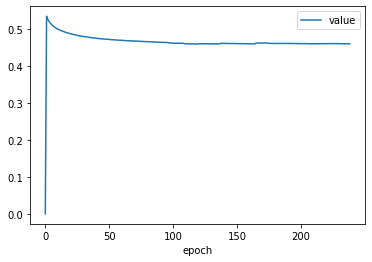

    tag  epoch     value
0  loss      0  0.000000
1  loss      1  0.535666
2  loss      2  0.526980
3  loss      3  0.521088
4  loss      4  0.516527


ValueError: x and y must have same first dimension, but have shapes (239,) and (1,)

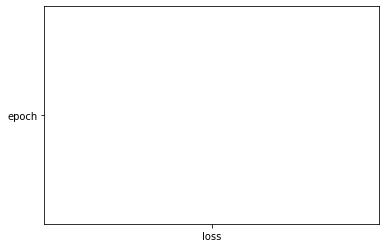

In [69]:
losses = wt_approx_f1_imb_df.loc[wt_approx_f1_imb_df['tag'] == "loss"]
print(losses.head())
plt.plot(losses['tag'], ['epoch'])
plt.show()

In [61]:
baseline_df = baseline_df.sort_values(by=['tag', 'epoch'])
baseline_df = baseline_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

,tag,epoch,value,run_name,stage
64741,val/w-f1,143,0.603471,baseline-ce-2,validation
226309,val/w-f1,143,0.603471,baseline-ce-8,validation
10659,val/w-f1,143,0.603471,baseline-ce-0,validation
118597,val/w-f1,143,0.603471,baseline-ce-4,validation
145525,val/w-f1,143,0.603471,baseline-ce-5,validation
37813,val/w-f1,143,0.603471,baseline-ce-1,validation
253237,val/w-f1,143,0.603471,baseline-ce-9,validation
91669,val/w-f1,143,0.603471,baseline-ce-3,validation
172453,val/w-f1,143,0.603471,baseline-ce-6,validation
199381,val/w-f1,143,0.603471,baseline-ce-7,validation


In [63]:
baseline_df.head()

,tag,epoch,value
0,loss,0,0.000000
1,loss,1,2.131722
2,loss,2,2.084117
3,loss,3,2.050036
4,loss,4,2.024923


In [ ]:
# for train

# for validation 
# for test 